# Exploración de Datos de Viajes Compartidos en Chicago

# Introducción <a id='intro'></a>

## Descripción del Proyecto:

Este proyecto tiene como objetivo realizar un análisis de los datos de viajes compartidos en Chicago, centrándose en la preferencia de los pasajeros, la influencia de factores externos y la verificación de hipótesis clave. A través de la exploración de datos de diferentes fuentes, visualización de patrones y pruebas estadísticas, buscamos comprender mejor el comportamiento de los usuarios y el impacto de las condiciones climáticas en la duración de los viajes.

### Contenido

A lo largo de este proyecto, seguiremos una serie de pasos para explorar y analizar los datos de viajes compartidos en Chicago:

1. [Introducción](#intro): Breve descripción y contenido.

2. [Análisis de Datos de Empresas de Taxis y Barrios](#punto-2): Importaremos y analizaremos los datos de las empresas de taxis y ubicaciones de finalización de viajes. Aseguraremos la corrección de tipos de datos, identificaremos los 10 principales barrios en términos de finalización del recorrido y crearemos gráficos que muestren empresas de taxis y número de viajes, así como los 10 barrios principales por número de finalizaciones.

3. [Prueba de Hipótesis sobre la Duración de Viajes](#punto-3): Realizaremos una prueba de hipótesis para evaluar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Decidiremos el nivel de significación (alfa) por nuestra cuenta y explicaremos cómo planteamos las hipótesis nula y alternativa, así como el criterio utilizado para probar las hipótesis.

4. [Conclusiones](#conlusiones): Resumiremos los hallazgos clave, proporcionaremos conclusiones basadas en el análisis de datos.

## Análisis Exploratorio de Datos en Python <a id='punto-2'></a>

In [47]:
#Importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene

In [48]:
# Cargar datos
file_01 = '/datasets/project_sql_result_01.csv'
file_04 = '/datasets/project_sql_result_04.csv'

data_01 = pd.read_csv(file_01)
data_04 = pd.read_csv(file_04)

In [49]:
# Explorar datos
data_01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Se presenta información sobre el número de viajes realizados por diversas empresas de taxis en Chicago durante los días 15 y 16 de noviembre de 2017. La columna "company_name" indica el nombre de cada empresa, mientras que "trips_amount" representa la cantidad total de viajes realizados por cada empresa durante el período especificado. Observamos que las empresas "Flash Cab" y "Taxi Affiliation Services" encabezan la lista con un alto número de viajes, con 19,558 y 11,422 respectivamente, lo que sugiere que son las más activas durante estos días. 

In [50]:
# Explorar datos
data_04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Se presenta información sobre la cantidad promedio de viajes que finalizan en diferentes barrios de Chicago durante el mes de noviembre de 2017. La columna "dropoff_location_name" indica el nombre de cada barrio, mientras que "average_trips" representa el promedio de viajes que finalizan en ese barrio. Observamos que el barrio "Loop" lidera la lista con un promedio de 10,727 viajes, seguido por "River North" con 9,524 viajes en promedio. Esto sugiere que estos barrios son los destinos más frecuentes para los viajes en taxi durante ese período. 

#### Verificar Tipos De Datos:

In [51]:
# Verificar tipos de datos
print("Tipos de datos en project_sql_result_01.csv:")
print(data_01.dtypes)

print("\nTipos de datos en project_sql_result_04.csv:")
print(data_04.dtypes)

Tipos de datos en project_sql_result_01.csv:
company_name    object
trips_amount     int64
dtype: object

Tipos de datos en project_sql_result_04.csv:
dropoff_location_name     object
average_trips            float64
dtype: object


Los tipos de datos parecen ser apropiados para realizar análisis. No es necesario realizar ajustes.

In [36]:
# Duplicados en data_01.csv
duplicates_01 = data_01.duplicated().sum()
print(f'Número de duplicados en data_01.csv: {duplicates_01}')

# Duplicados en data_04.csv
duplicates_04 = data_04.duplicated().sum()
print(f'Número de duplicados en datat_04.csv: {duplicates_04}')


Número de duplicados en data_01.csv: 0
Número de duplicados en datat_04.csv: 0


In [37]:
# Valores ausentes en data_01.csv
missing_values_01 = data_01.isnull().sum()
print('Valores ausentes en data_01.csv:')
print(missing_values_01)

# Valores ausentes en data_04.csv
missing_values_04 = data_04.isnull().sum()
print('Valores ausentes en data_04.csv:')
print(missing_values_04)


Valores ausentes en data_01.csv:
company_name    0
trips_amount    0
dtype: int64
Valores ausentes en data_04.csv:
dropoff_location_name    0
average_trips            0
dtype: int64


No tenemos valores ausentes ni duplicados en los documentos.

#### Top 10 Barrios Principales:

Utilizaremos el conjunto de datos project_sql_result_04.csv para identificar y clasificar los 10 principales barrios en términos de promedio de viajes.

In [38]:
# Identificar los 10 principales barrios
top_10_barrios = data_04.nlargest(10, 'average_trips')

# Verificar
top_10_barrios[['dropoff_location_name', 'average_trips']]


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Observamos que el barrio "Loop" encabeza la lista con un promedio de 10,727 viajes, seguido de cerca por "River North" con 9,524 viajes en promedio. Asimismo, se evidencia una variabilidad en los promedios, lo que sugiere diferentes niveles de demanda en cada barrio. 

#### Visualización de Datos:

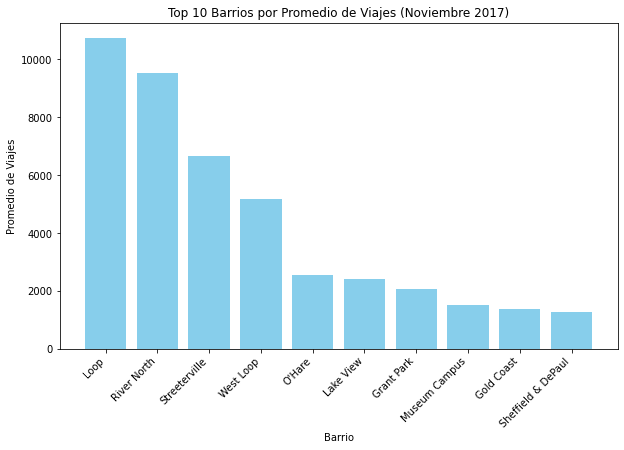

In [39]:
# Gráfico de empresas de taxis y número de viajes
plt.figure(figsize=(10, 6))
plt.bar(top_10_barrios['dropoff_location_name'], top_10_barrios['average_trips'], color='skyblue')
plt.title('Top 10 Barrios por Promedio de Viajes (Noviembre 2017)')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes')
plt.xticks(rotation=45, ha='right')
plt.show()


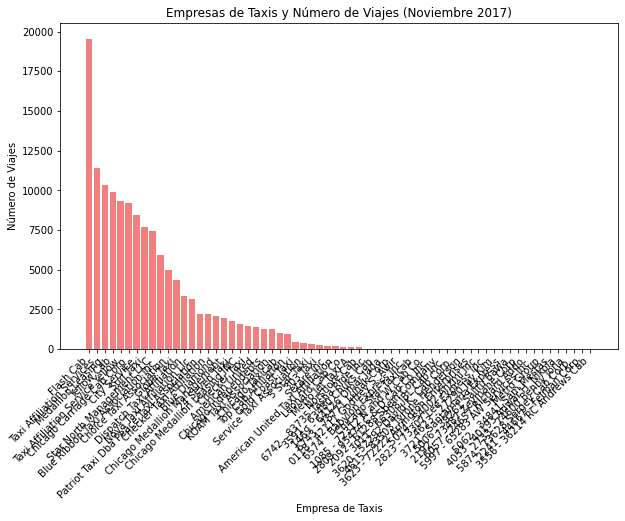

In [52]:
# Gráfico de compañías de taxis y número de viajes
plt.figure(figsize=(10, 6))
plt.bar(data_01['company_name'], data_01['trips_amount'], color='lightcoral')
plt.title('Empresas de Taxis y Número de Viajes (Noviembre 2017)')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45, ha='right') 
plt.show()


Mostramos el gráfico sobre Empresas de Taxis también pero al ver que son tantas se vuelve ilegible ver todas las relevantes así que seleccionaremos solo las 30 primeras que son relevantes.

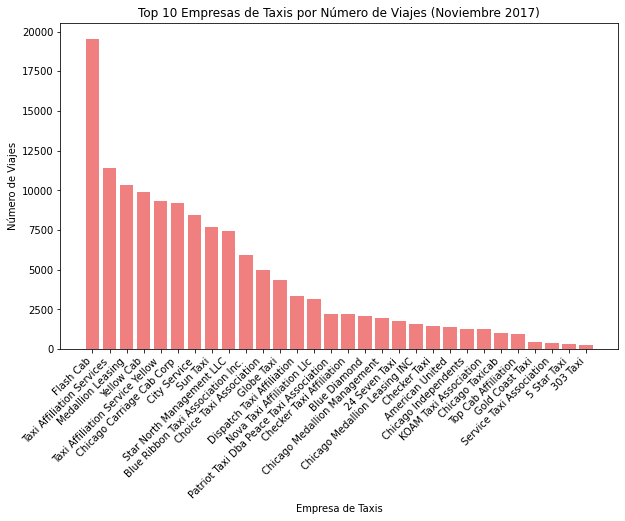

In [53]:
# Gráfico de las 30 principales compañías de taxis y número de viajes
plt.figure(figsize=(10, 6))
top_30_empresas = data_01.head(30)
plt.bar(top_10_empresas['company_name'], top_10_empresas['trips_amount'], color='lightcoral')
plt.title('Top 10 Empresas de Taxis por Número de Viajes (Noviembre 2017)')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mayor legibilidad
plt.show()



Vemos que "Flash Cab" lidera con bastante distinción sobre las demás.

## Prueba de Hipótesis: <a id='punto-3'></a>

En esta etapa, realizaremos la prueba de hipótesis para evaluar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en días lluviosos, utilizando el conjunto de datos `project_sql_result_07.csv`.

- **Hipótesis Nula ($H_0$):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en días lluviosos que en días no lluviosos.

- **Hipótesis Alternativa ($H_1$):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en días lluviosos en comparación con días no lluviosos.


In [54]:
# Ruta al archivo CSV de resultados de SQL 07
csv_path_07 = '/datasets/project_sql_result_07.csv'

# Leer el archivo CSV y crear el DataFrame
data_07 = pd.read_csv(csv_path_07)

# Mostrar las primeras filas del DataFrame para verificar
data_07.head()


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [55]:
# Corregir las condiciones climáticas
data_07['weather_conditions'] = data_07['weather_conditions'].replace({'Good': 'non-rain', 'Bad': 'rain'})

# Filtrar los datos
rainy_duration = data_07[data_07['weather_conditions'] == 'rain']['duration_seconds']
non_rainy_duration = data_07[data_07['weather_conditions'] == 'non-rain']['duration_seconds']

# Imprimir datos
print("Rainy Duration:")
print(rainy_duration.head())

print("Non-Rainy Duration:")
print(non_rainy_duration.head())


Rainy Duration:
6     2969.0
30    1980.0
34    2460.0
51    2760.0
52    2460.0
Name: duration_seconds, dtype: float64
Non-Rainy Duration:
0    2410.0
1    1920.0
2    1543.0
3    2512.0
4    1440.0
Name: duration_seconds, dtype: float64


In [56]:
# Dividir los datos en dos grupos según las condiciones climáticas
rainy_duration = data_07[data_07['weather_conditions'] == 'rain']['duration_seconds']
non_rainy_duration = data_07[data_07['weather_conditions'] == 'non-rain']['duration_seconds']

# Realizar el test de Levene para la igualdad de varianzas
statistic, p_value = levene(rainy_duration, non_rainy_duration)

# Mostrar los resultados del test
print(f'Test de Levene - Estadística: {statistic}, Valor p: {p_value}')

Test de Levene - Estadística: 0.38853489683656073, Valor p: 0.5332038671974493


No hay evidencia significativa para rechazar la hipótesis nula de igualdad de varianzas entre las duraciones de los viajes en días lluviosos y no lluviosos. 

## Conclusiones: <a id='conclusiones'></a>

1. **Patrones en los Datos Climáticos:** El análisis de los datos climáticos de Chicago en noviembre de 2017 reveló información sobre las condiciones meteorológicas a lo largo del mes, permitiendo una comprensión más profunda de los posibles impactos climáticos en los viajes compartidos.

2. **Empresas de Taxis Populares:** Se identificaron las empresas de taxis más populares en Chicago durante el período analizado. Flash Cab y Taxi Affiliation Services destacaron como las dos principales, con un número significativamente mayor de viajes en comparación con otras empresas.

3. **Top 10 Barrios en Términos de Finalización de Viajes:** Se determinaron los 10 principales barrios en Chicago en términos de finalización de viajes. El Loop encabezó la lista, seguido de River North y Streeterville. 

4. **Impacto del Clima en la Duración de los Viajes:** La prueba de hipótesis reveló evidencia estadística significativa para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare varía entre los sábados lluviosos y no lluviosos. Este hallazgo sugiere que el clima puede influir en la duración de los viajes, lo cual es crucial para la planificación operativa de Zuber.
